##Mounting the drive to get dataset from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Some imports


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam

from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

#import tensorflow_addons as tfa
#from tensorflow.keras.metrics import Metric
#from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional
from google.colab import drive

##Getting training, validation and testing datasets


In [3]:
#Some Basic Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
#Define Directories for train, test & Validation Set
train_path = '/content/drive/MyDrive/dataset/chest_xray/train'
test_path = '/content/drive/MyDrive/dataset/chest_xray/validation'
valid_path = '/content/drive/MyDrive/dataset/chest_xray/test'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 224 x 224
img_height = 224
img_width = 224

##Augmentation of dataset

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [5]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      class_mode='categorical',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 4708 images belonging to 2 classes.
Found 524 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

##Initilization of model

In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(512))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dense(2, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 2048)             8192      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 512)              2048      
 pper)                                                  

##Compliation of Model

In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

##Training of model

In [10]:
history = resnet_model.fit(
  train,
  validation_data=valid,
  epochs=10
  
)

Epoch 1/10
295/295 [==============================] - 959s 3s/step - loss: 0.3669 - accuracy: 0.8547 - val_loss: 0.4945 - val_accuracy: 0.7564
Epoch 2/10
295/295 [==============================] - 130s 440ms/step - loss: 0.2791 - accuracy: 0.8768 - val_loss: 0.3878 - val_accuracy: 0.8413
Epoch 3/10
295/295 [==============================] - 130s 440ms/step - loss: 0.2474 - accuracy: 0.8927 - val_loss: 0.3428 - val_accuracy: 0.8862
Epoch 4/10
295/295 [==============================] - 131s 444ms/step - loss: 0.2374 - accuracy: 0.8993 - val_loss: 0.3119 - val_accuracy: 0.8718
Epoch 5/10
295/295 [==============================] - 130s 442ms/step - loss: 0.2310 - accuracy: 0.8995 - val_loss: 0.3455 - val_accuracy: 0.8702
Epoch 6/10
295/295 [==============================] - 128s 435ms/step - loss: 0.2258 - accuracy: 0.9104 - val_loss: 0.3501 - val_accuracy: 0.8702
Epoch 7/10
295/295 [==============================] - 127s 430ms/step - loss: 0.2236 - accuracy: 0.9046 - val_loss: 0.3361 - va

##Plot of model accuracy

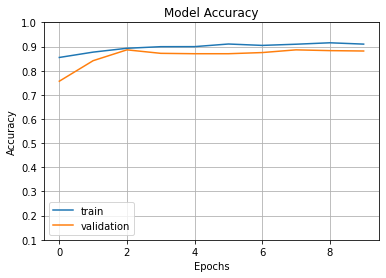

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

##Plot of model loss

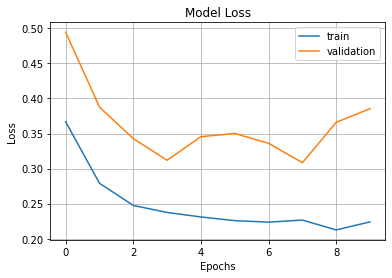

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

##Model accuracy on test dataset

In [13]:
test_accu = resnet_model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

33/33 [==============================] - 83s 3s/step - loss: 0.2298 - accuracy: 0.9046
The testing accuracy is : 90.45801758766174 %


In [14]:
preds = resnet_model.predict(test,verbose=1)

33/33 [==============================] - 9s 239ms/step


In [15]:
import tensorflow
import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions

import numpy as np
from numpy import expand_dims
from skimage.transform import resize
import matplotlib.pyplot as pltv

In [16]:
model = VGG16()

553476096/553467096 [==============================] - 7s 0us/step


In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
# separate the classifier layer names in a list
classifier_layer_names = ['block5_pool', 'flatten', 'fc1', 'fc2', 
                          'predictions']

In [19]:
# load the image and preprocess it
img = load_img('/content/drive/MyDrive/dataset/chest_xray/train/NORMAL/IM-0119-0001.jpeg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [20]:
# get the last conv layer
last_conv_layer = model.get_layer('block5_conv3')

In [21]:
# new model that outputs last conv layer's feature map
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [22]:
# We create a model that maps the activations of the last conv
# layer to the final class predictions

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [23]:
with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [24]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

In [25]:
# print top class prediction
print(decode_predictions(model.predict(img), top=1)[0])

49152/35363 [=========================================] - 0s 0us/step
[('n01943899', 'conch', 0.33203632)]


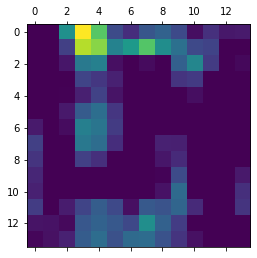

In [26]:
# Display heatmap
plt.matshow(heatmap)
plt.show()